# Regression Demo Model Runbook

<img src="https://v5c5v6u7.stackpathcdn.com/wp-content/uploads/blog/demand-forecasting.jpg" alt="forecasting" width="800"/>

## Context
The problem is borrowed from Kaggle competitions "https://www.kaggle.com/kannanaikkal/food-demand-forecasting". 
The task is to forecast the number of orders for different meal items at different fulfillment centers for a meal delivery company that operates in multiple cities.
145 weeks worth of sale data is provided for different centers and the client needs help with demand forecasting at these centers for upcoming weeks so that these centers will plan the stock of perishable raw materials accordingly. In addition to the sales data, client has also provided some meta data on its meal items (e.g. meal category and type of cuisine) and the fulfillment center (e.g. operating area and type of center).
Since the labels for test data are not available, we only use train data set in this demo exercise and hold out some proportion for evaluation.  
The forecasting would help in improving business growth and planning staffing schedules.

## Exploratory Data Analysis

In [1]:
import pandas as pd
#load data from the already downloaded csvs from Kaggle
base_info = pd.read_csv('Datasets/train.csv')
meal_info = pd.read_csv('Datasets/meal_info.csv')
center_info = pd.read_csv('Datasets/fulfilment_center_info.csv')

In [2]:
df_combined = pd.merge(left=base_info, right=center_info, left_on='center_id',
                    right_on = 'center_id', how='left')
df_combined = pd.merge(left=df_combined, right=meal_info, left_on='meal_id',
                    right_on = 'meal_id', how='left')
if 'id' in df_combined.columns:
    df_combined.set_index('id', inplace=True)
df_combined.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [3]:
feature_names_selected = ['checkout_price', 'base_price',
                 'emailer_for_promotion', 'homepage_featured',
                 'op_area', 'category', 'cuisine']
target_name = 'num_orders'
feature_names_numeric = ['checkout_price', 'base_price', 'op_area']
feature_names_selected_cat = ['center_type', 'category', 'cuisine']
feature_names_cat_all = ['center_id', 'city_code', 'region_code', 'center_type', 'category', 'cuisine']
df_combined[feature_names_cat_all].astype('category')

,center_id,city_code,region_code,center_type,category,cuisine
id,,,,,,
1379560,55,647,56,TYPE_C,Beverages,Thai
1466964,55,647,56,TYPE_C,Beverages,Thai
1346989,55,647,56,TYPE_C,Beverages,Thai
1338232,55,647,56,TYPE_C,Beverages,Indian
1448490,55,647,56,TYPE_C,Beverages,Indian
...,...,...,...,...,...,...
1271326,61,473,77,TYPE_A,Desert,Indian
1062036,61,473,77,TYPE_A,Desert,Indian
1110849,61,473,77,TYPE_A,Salad,Italian


In [5]:
#basic data stats 
df_combined.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


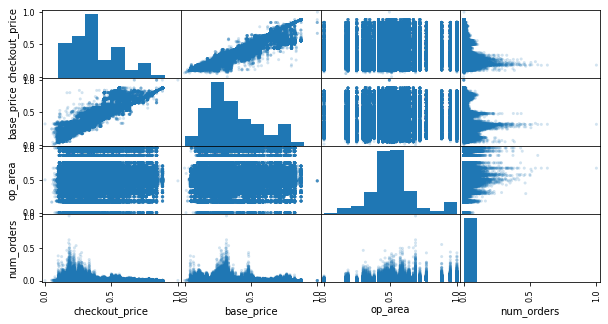

In [6]:
# correlation plots for numeric variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sel_col = feature_names_numeric+[target_name]
df_tf = pd.DataFrame(scaler.fit_transform(df_combined[sel_col].values), columns=sel_col)
plt = pd.plotting.scatter_matrix(df_tf, alpha=0.2, figsize=(10,5))

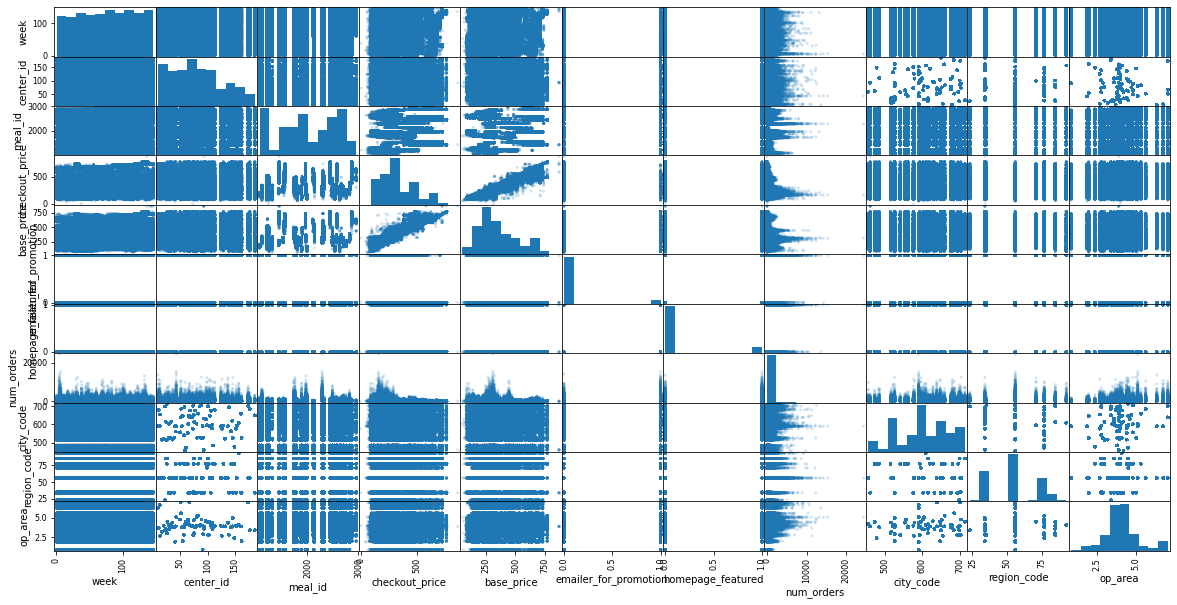

In [7]:
#scatter matrix of all variables without transformation
plt = pd.plotting.scatter_matrix(df_combined, alpha=0.2, figsize=(20,10))

<AxesSubplot:>

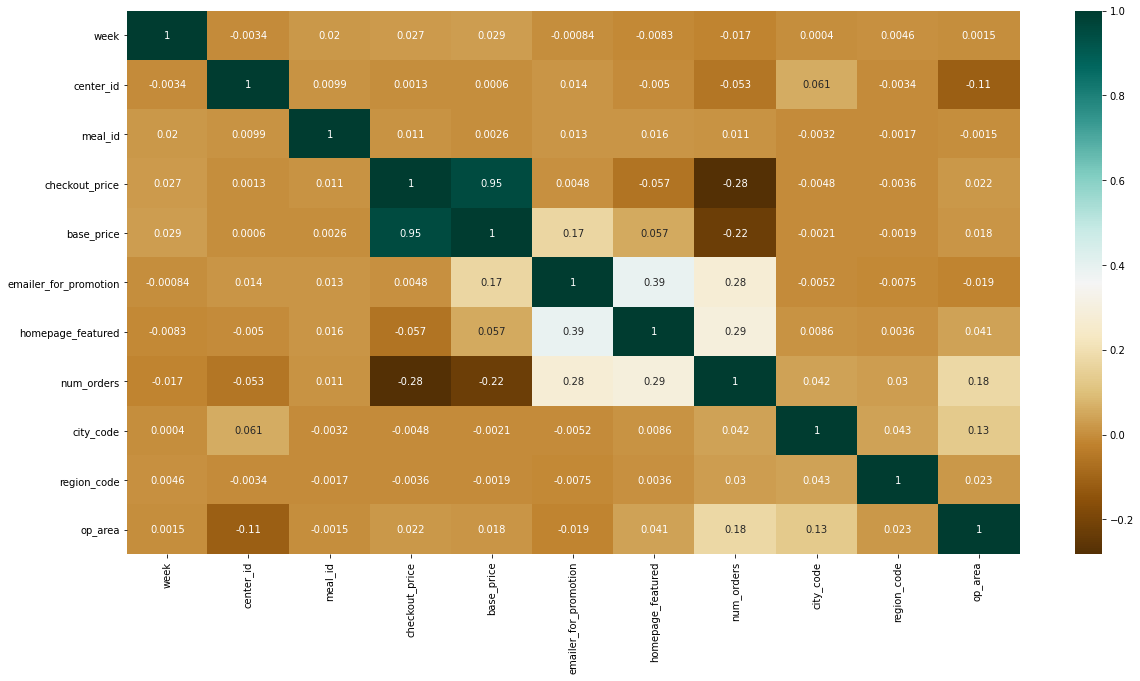

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
c = df_combined.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

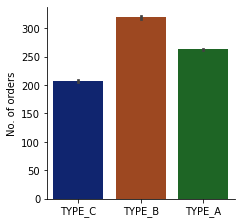

In [5]:
g = sns.catplot(
    data=df_combined, kind="bar",
    x="center_type", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(3)
g.fig.set_figheight(3)
g.set_axis_labels("", "No. of orders")

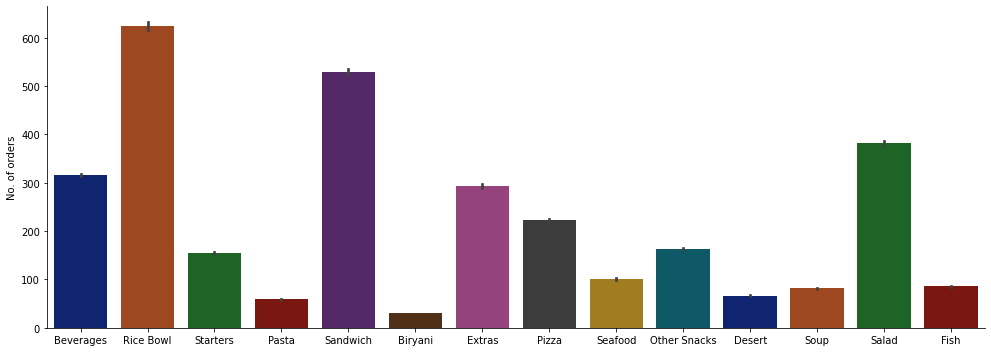

In [6]:
g = sns.catplot(
    data=df_combined, kind="bar",
    x="category", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("", "No. of orders")

<AxesSubplot:xlabel='week', ylabel='num_orders'>

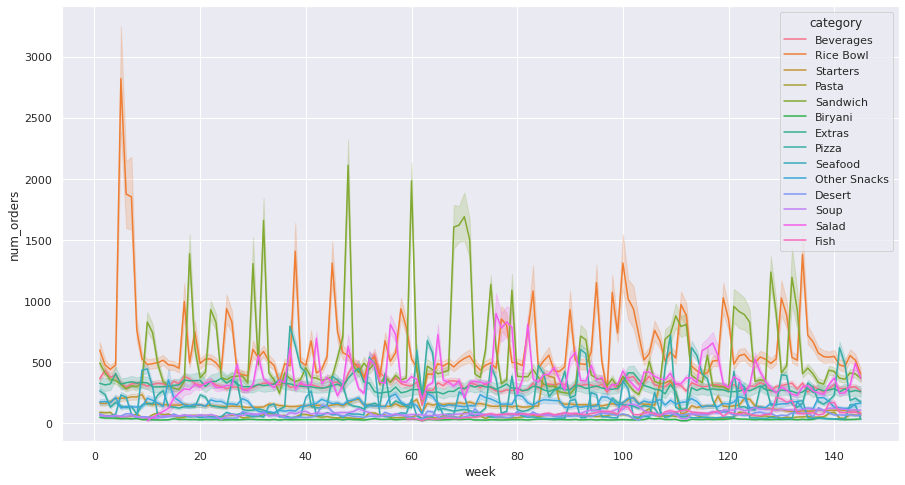

In [7]:
df_select = df_combined[(df_combined['category'] == 'Pasta') | (df_combined['category'] == 'Beverages')]
sns.set(rc={'figure.figsize':(15, 8)})
sns.lineplot(x="week", y="num_orders", data=df_combined, hue="category")

<AxesSubplot:xlabel='week', ylabel='num_orders'>

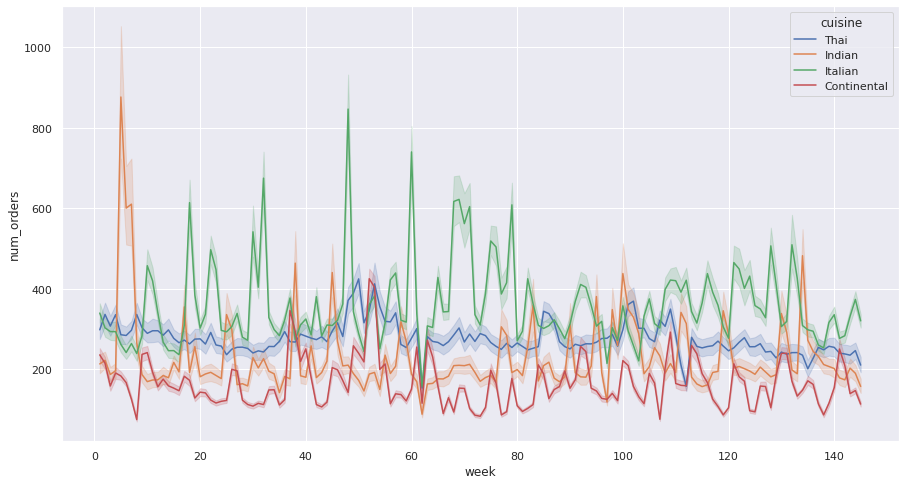

In [9]:
sns.lineplot(x="week", y="num_orders", data=df_combined, hue="cuisine")

# Model Development

## 1. Establish connection to AOPS Vantage instance

In [3]:
#teradata ML Libraries
from teradataml import DataFrame , create_context, copy_to_sql
import getpass

In [4]:
#connection context; AOPS Demo Environment's Vantage instance  
host = '3.238.151.85'
username = 'AOA_DEMO' 
password = getpass.getpass() 
#logmech = 'LDAP'
database_name = 'AOA_DEMO'

 ··········


In [5]:
# create the connection using credentials
eng=create_context(host=host, username=username, password=password)#, logmech=logmech)
conn=eng.connect()

## 2. Upload data to AOPS Vantage instance for demo

This is not part of the demo. In a real case, we can assume that the data already resides in Teradata (Vantage) or will be loaded through other data pipelines. For this demo we manually load the data into Vantage to be used in AOPS UI/workflow.

In [6]:
#upload to AOPS Vantage instance
base_info.set_index('id', inplace=True)
copy_to_sql(base_info, table_name='demand_forecast_demo_base', schema_name='AOA_DEMO', if_exists='replace')
copy_to_sql(meal_info, table_name='demand_forecast_demo_meal', schema_name='AOA_DEMO', if_exists='replace')
copy_to_sql(center_info, table_name='demand_forecast_demo_center', schema_name='AOA_DEMO', if_exists='replace')

In [7]:
#read back data into TD DataFrames
df_base = DataFrame('demand_forecast_demo_base')
df_meal_info = DataFrame('demand_forecast_demo_meal')
df_center_info = DataFrame('demand_forecast_demo_center')
df_base.head()

   week  center_id  meal_id  checkout_price  base_price  emailer_for_promotion  homepage_featured  num_orders
0     1        108     1311          170.75      171.75                      0                  0         406
1     1        146     1525          242.50      244.50                      0                  0         150
2     1         10     2492          388.03      387.03                      0                  0         162
3     1        102     1962          582.03      612.07                      1                  0          82
4     1         64     1727          427.83      425.83                      0                  0         177
5     1         42     1230          321.10      321.10                      0                  0         135
6     1         24     2444          626.62      627.62                      0                  0          27
7     1         34     2826          279.36      281.36                      0                  0         432
8     1   

## 3. Considering the data is already in Vantage the data science steps may start from here

### 3.2. Baseline model and its performance using the raw features only

In [8]:
# load td and non-td libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor)
from xgboost import XGBRegressor
import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [9]:
# lets encapsulate some common evaluation logic into a function 
# to be used for experimenting with multiple algorithms, etc. 
def eval_model(model, alg_name, X, y):
    y_pred = model.predict(X).ravel()
    y = y.ravel()
    print(alg_name)
    print('r^2 = ', skm.r2_score(y, y_pred))
    print('mae = ', skm.mean_absolute_error(y, y_pred))
    print('mse = ', skm.mean_squared_error(y, y_pred))
    #print('msle = ', skm.mean_squared_log_error(y, y_pred))
    print('----------------------------------------------')
    plot_results(y, y_pred)
    #return y_pred

In [10]:
def plot_results(y_true, y_pred):    
    result_df = pd.DataFrame(np.vstack((y_true, y_pred)).T, 
                                        columns=['Actual', 'Predicted'])
    df = result_df.sample(n=100, replace=True)
    df['No.'] = range(len(df))
    df.plot(x="No.", y=['Actual', 'Predicted'], kind = 'line', legend=True, 
            subplots = False, sharex = True, figsize = (5.5,4), ls="none", 
            marker="o", alpha=0.4)    
    plt.show()

In [11]:
# lets encapsulate some common experiment running logic into a function 
# to allow experimenting with multiple algorithms, etc. 
def run_experiment(X, y) :   
    #we want to keep the sequence in tact so shuffle is set to false
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                      random_state=rand_seed, 
                                                      shuffle=False)
    
    rfr = RandomForestRegressor(random_state=rand_seed, n_estimators=10)
    gbr = GradientBoostingRegressor(random_state=rand_seed)
    xgb = XGBRegressor(random_state=rand_seed)
    
    rfr_fitted = rfr.fit(x_train, y_train.ravel())
    gbr_fitted = gbr.fit(x_train, y_train.ravel())
    xgb_fitted = xgb.fit(x_train, y_train.ravel())
    
    y_pred_rfr = eval_model(rfr_fitted, 'RandomForest', x_val, y_val)
    y_pred_gbr = eval_model(gbr_fitted, 'GradientBoost', x_val, y_val)
    y_pred_xgb = eval_model(xgb_fitted, 'XGBoost', x_val, y_val)
    
    #plot_results(y_val, y_pred_rfr, y_pred_gbr, y_pred_xgb)    
    #return y_val, y_pred_rfr, y_pred_gbr, y_pred_xgb

[03:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomForest
r^2 =  0.6890775593315253
mae =  93.9244770018662
mse =  36754.91130149248
----------------------------------------------


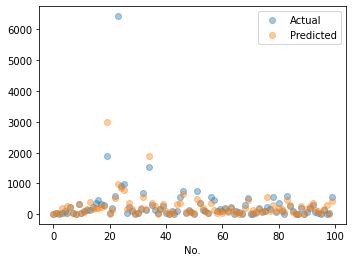

GradientBoost
r^2 =  0.5084059330399292
mae =  138.48250475214107
mse =  58112.55144083709
----------------------------------------------


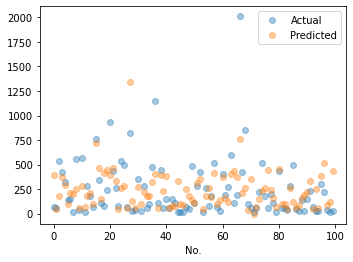

XGBoost
r^2 =  0.508354691732918
mae =  138.4903103062036
mse =  58118.60880257051
----------------------------------------------


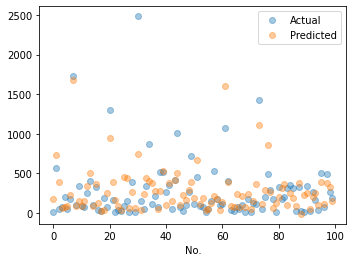

In [12]:
train_pdf = df_base.to_pandas(all_rows=True)
rand_seed = 111
X = train_pdf[['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured']]
y = train_pdf['num_orders']

run_experiment(X, y)

### 2.3. A better model using simple data wrangling 

In [13]:
# this shows how we can do some data wrangling in-db by calling sql using TDML library
# this sql allows adding additional features by combining information from 
# the meal_info and center_info tables
train_df = DataFrame.from_query('''
SELECT a.*, b.category, b.cuisine, c.center_type, c.op_area
FROM demand_forecast_demo_base as a
	LEFT JOIN 
	demand_forecast_demo_meal as b 
	ON 
	a.meal_id = b.meal_id
	LEFT JOIN 
	demand_forecast_demo_center as c 
	ON
	a.center_id = c.center_id;
    ''')
train_df.head()

   week  center_id  meal_id  checkout_price  base_price  emailer_for_promotion  homepage_featured  num_orders      category      cuisine center_type  op_area
0     1         64     2704          244.50      244.50                      0                  0         123  Other Snacks         Thai      TYPE_A      4.4
1     1         65     2126          437.50      438.50                      0                  1          94         Pasta      Italian      TYPE_A      4.8
2     1         53     1525          242.50      280.33                      0                  1         258  Other Snacks         Thai      TYPE_A      3.8
3     1        139     1778          147.50      146.50                      0                  0          27     Beverages      Italian      TYPE_C      2.8
4     1         76     2577          282.33      280.33                      0                  0          54      Starters         Thai      TYPE_A      3.0
5     1         14     1311          189.18      190

[03:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomForest
r^2 =  0.7422912714585944
mae =  82.80582411564997
mse =  30464.386677253315
----------------------------------------------


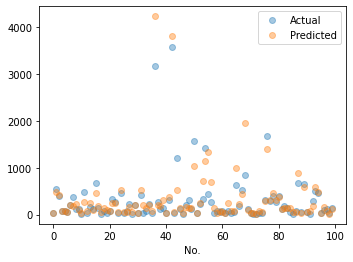

GradientBoost
r^2 =  0.6447283750234086
mae =  117.56331300470012
mse =  41997.538150920926
----------------------------------------------


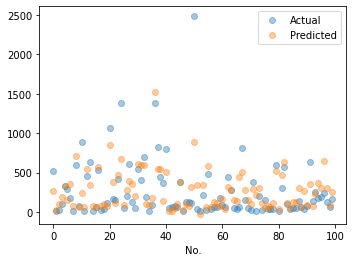

XGBoost
r^2 =  0.6449390316021213
mae =  117.71200447632285
mse =  41972.635915337625
----------------------------------------------


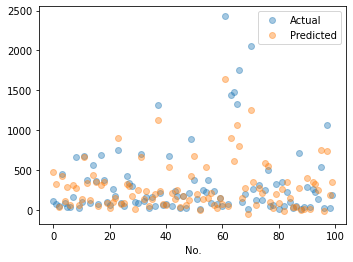

In [14]:
# Experiment 2: train/evaluate model(s) with additional features
# also encode categorical features using one-hot encoding

rand_seed = 111 #999
## Data Prep
feature_names = ['center_id', 'meal_id', 'checkout_price', 'base_price',
                'emailer_for_promotion', 'homepage_featured','center_type', 
                 'op_area', 'category', 'cuisine']
feature_names_cat = ['center_type', 'category', 'cuisine']
target_name = 'num_orders'

# cast the td dataframe into a pandas dataframe to allow
# using the data with sklearn models/functions
train_pdf = train_df.to_pandas(all_rows = True)

#one hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
features_df = pd.DataFrame(encoder.fit_transform(train_pdf[feature_names_cat]), 
                            columns=encoder.get_feature_names())

# dataframe with encoded features
train_pdf.drop(columns=feature_names_cat, inplace=True)
train_pdf_enc = pd.concat((train_pdf, features_df), axis=1)

# features and target columns 
X = train_pdf_enc.drop(columns=target_name)
y = train_pdf_enc[target_name]

run_experiment(X, y)

### 3.3. Upload the combined dataset to Vantage to be consumed by AOA 

In [ ]:
# we do not have any separate labelled test dataset so we need to build
# train/test tables for demo to be used by AOA using the train set
# and since we want to keep the sequence, instead of sampling we use the fix sizes
n = round(train_df.shape[0]*0.8) #80% data for training
copy_to_sql(df = train_df.iloc[0:n], table_name = "DEMAND_FORECAST_TRAIN", index=False, if_exists="replace")
copy_to_sql(df = train_df.iloc[n:], table_name = "DEMAND_FORECAST_TEST", index=False, if_exists="replace")

In [ ]:
from teradataml import remove_context
remove_context()